In [115]:
# importing required packages:

import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier 

In [116]:
# Reading the data:

os.chdir(r"C:\Users\apega\My py notes\Python for Data Science\other saved files")
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
# shape of data:

df.shape

(150, 6)

# Pre-processing

X as the Feature Matrix (data of df)

y as the response vector (target)

In [118]:
df1 =  df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # Simply storing the features except target variable. 

In [119]:
# Remove the column containing the target name since it doesn't contain numeric values.

In [120]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [121]:
# fill the target variable.

y = df["Species"]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Setting up the Decision Tree

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
# Splitting the data with test set = 30%:

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [124]:
# shape of X_trainset and y_trainset:

print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (45, 4) &  Size of Y training set (45,)


# Modeling

In [125]:
SpeciesTree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [126]:
SpeciesTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

# Prediction

In [127]:
predTree = SpeciesTree.predict(X_testset)

In [128]:
# visually comparing the predicted values and actual values:

print (predTree [0:5])
print (y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


so, here we can see that actual values are same as predicted values

# Evaluation

In [129]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9555555555555556


# Visualizing


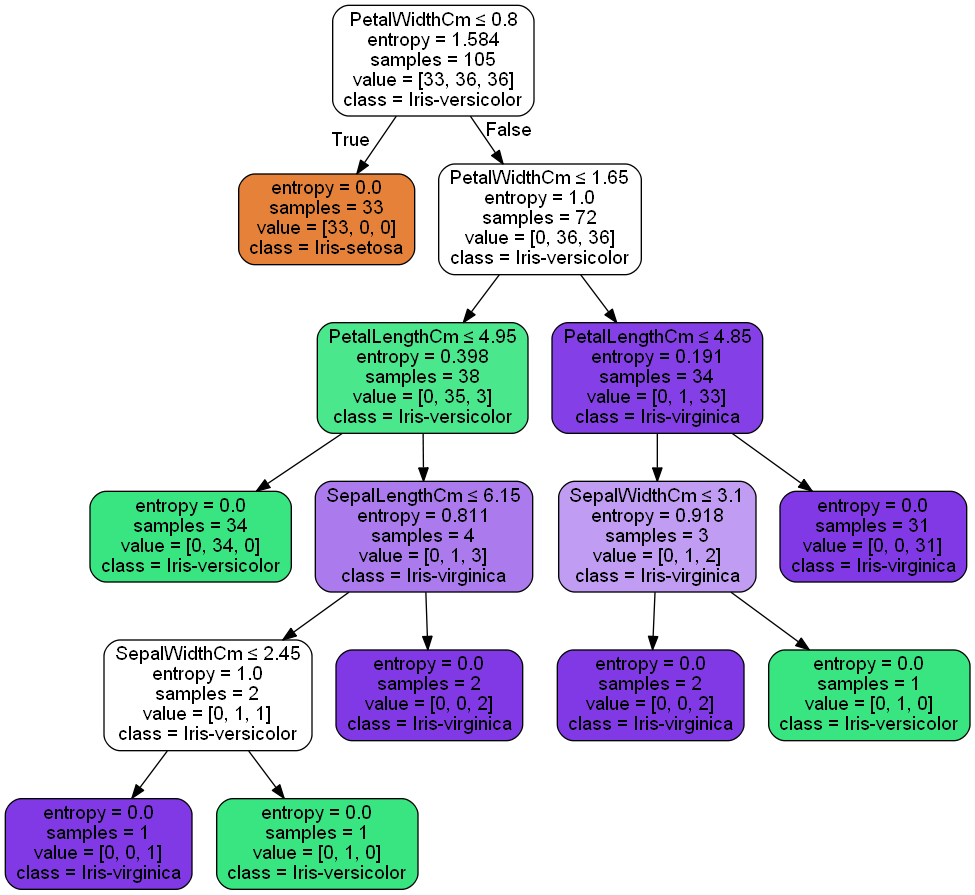

In [130]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import os
os.environ["PATH"] += os.pathsep + r'D:\Anaconda\Lib\site-packages\graphviz'

# Visualize the graph
dot_data = StringIO()
export_graphviz(SpeciesTree, out_file = dot_data, feature_names= df1.columns, class_names= np.unique(y_trainset),  filled = True, rounded = True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())